In [ ]:
import pandas as pd

df_dirty = pd.read_csv('netlog.csv')

In [ ]:
df_dirty

,timestamp,src_ip,dst_ip,protocol,length,src_port,dst_port,flags,ttl,payload_size,protocol_name
0,2025-04-24 22:38:15,134.88.131.193,134.88.143.255,17,305,54915.0,54915.0,NaN,128,263.0,UDP
1,2025-04-24 22:38:16,134.88.137.164,35.186.224.30,6,82,50315.0,443.0,PA,128,28.0,TCP
2,2025-04-24 22:38:16,35.186.224.30,134.88.137.164,6,54,443.0,50315.0,A,55,0.0,TCP
3,2025-04-24 22:38:16,35.186.224.30,134.88.137.164,6,78,443.0,50315.0,PA,55,24.0,TCP
4,2025-04-24 22:38:16,134.88.131.148,239.255.255.250,17,666,55001.0,3702.0,NaN,1,624.0,UDP
...,...,...,...,...,...,...,...,...,...,...,...
16336304,2025-04-26 22:41:26,134.88.138.6,134.88.143.255,17,92,137.0,137.0,NaN,64,50.0,UDP
16336305,2025-04-26 22:41:26,134.88.138.6,134.88.143.255,17,92,137.0,137.0,NaN,64,50.0,UDP
16336306,2025-04-26 22:41:26,134.88.129.199,134.88.143.255,17,92,137.0,137.0,NaN,64,50.0,UDP
16336307,2025-04-26 22:41:26,134.88.129.199,134.88.143.255,17,92,137.0,137.0,NaN,64,50.0,UDP


In [ ]:
df_dirty.describe()

,protocol,length,src_port,dst_port,ttl,payload_size
count,1.633631e+07,1.633631e+07,1.630497e+07,1.630497e+07,1.633631e+07,1.630497e+07
mean,7.855252e+00,8.485203e+02,1.244887e+04,4.023621e+04,9.338962e+01,7.973647e+02
std,4.129822e+00,6.846674e+02,2.323759e+04,2.590775e+04,3.845198e+01,6.827026e+02
min,1.000000e+00,4.600000e+01,5.300000e+01,9.000000e+00,1.000000e+00,0.000000e+00
25%,6.000000e+00,8.100000e+01,4.430000e+02,4.430000e+02,5.500000e+01,3.100000e+01
50%,6.000000e+00,1.462000e+03,4.430000e+02,5.461200e+04,1.190000e+02,1.408000e+03
75%,6.000000e+00,1.462000e+03,4.430000e+02,5.995400e+04,1.190000e+02,1.408000e+03
max,1.700000e+01,3.271400e+04,6.553500e+04,6.553500e+04,2.550000e+02,3.266000e+04


In [ ]:
df_dirty.columns

Index(['timestamp', 'src_ip', 'dst_ip', 'protocol', 'length', 'src_port',
       'dst_port', 'flags', 'ttl', 'payload_size', 'protocol_name'],
      dtype='object')

In [ ]:
df_dirty['flags'].value_counts()

,count
flags,
A,10696779
PA,2762139
FA,41402
S,23692
SA,21610
RA,1729
R,348
FPA,89


In [ ]:
df_dirty.isna()

,timestamp,src_ip,dst_ip,protocol,length,src_port,dst_port,flags,ttl,payload_size,protocol_name
0,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
16336304,False,False,False,False,False,False,False,True,False,False,False
16336305,False,False,False,False,False,False,False,True,False,False,False
16336306,False,False,False,False,False,False,False,True,False,False,False
16336307,False,False,False,False,False,False,False,True,False,False,False


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

df = pd.read_csv('netlog.csv')

# categorical columns ('src_ip', 'dst_ip', 'protocol_name') to numeric
label_encoder = LabelEncoder()
df['src_ip'] = label_encoder.fit_transform(df['src_ip'])
df['dst_ip'] = label_encoder.fit_transform(df['dst_ip'])
df['protocol_name'] = label_encoder.fit_transform(df['protocol_name'])

# one-hot encode flags value to cover NaNs
'''
In packet data, "flags" are control bits within the header of a packet, often in
 protocols like TCP, that provide information about the state of a connection or
 how a packet should be handled. These flags can be set or unset (on or off)***
 to control the flow of data, establish connections,
 and signal different states.
 ~site24x7.com
'''
df['flags'] = df['flags'].fillna('NaN').map({'NaN': 0, 'A': 1, 'PA': 2,
                                             'FA': 3, 'S': 4, 'SA': 5,
                                             'RA': 6, 'R': 7, 'FPA': 8})

# normalize numeric columns
scaler = MinMaxScaler()
df[['length', 'src_port', 'dst_port', 'flags', 'ttl', 'payload_size']] = scaler.fit_transform(
    df[['length', 'src_port', 'dst_port', 'flags', 'ttl', 'payload_size']]
)

# drop all rows with NaN in src_port, dst_port, and payload_size
df = df.dropna(subset=['src_port', 'dst_port', 'payload_size'])

# drop 'timestamp'
df = df.drop(columns=['timestamp'])

# feature-label split
X = df.values  # feature set


In [ ]:
#has_nan = df.isna().any().any()
#print(has_nan)
nan_in_columns = df.isna().any()

print(nan_in_columns)

src_ip           False
dst_ip           False
protocol         False
length           False
src_port         False
dst_port         False
flags            False
ttl              False
payload_size     False
protocol_name    False
dtype: bool


In [ ]:
# def autoencoder architecture
input_dim = X.shape[1]  # Number of features

# encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)  # Latent space

# decoder
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# compile model
autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,618 (25.85 KB)

 Trainable params: 6,618 (25.85 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# train autoencoder
history = autoencoder.fit(X, X, epochs=50, batch_size=256, validation_split=0.1, verbose=1)


Epoch 1/50
57323/57323 ━━━━━━━━━━━━━━━━━━━━ 177s 3ms/step - loss: 430761.1250 - val_loss: 505764.1562
Epoch 2/50
57323/57323 ━━━━━━━━━━━━━━━━━━━━ 190s 3ms/step - loss: 430925.4062 - val_loss: 505764.1562
Epoch 3/50
57323/57323 ━━━━━━━━━━━━━━━━━━━━ 203s 3ms/step - loss: 430756.6562 - val_loss: 505764.1562
Epoch 4/50
57323/57323 ━━━━━━━━━━━━━━━━━━━━ 196s 3ms/step - loss: 430912.1250 - val_loss: 505764.1562
Epoch 5/50
57323/57323 ━━━━━━━━━━━━━━━━━━━━ 157s 3ms/step - loss: 430865.6562 - val_loss: 505764.1562
Epoch 6/50
57323/57323 ━━━━━━━━━━━━━━━━━━━━ 161s 3ms/step - loss: 430854.8750 - val_loss: 505764.1562
Epoch 7/50
57323/57323 ━━━━━━━━━━━━━━━━━━━━ 218s 3ms/step - loss: 430806.1875 - val_loss: 505764.1562
Epoch 8/50
57323/57323 ━━━━━━━━━━━━━━━━━━━━ 159s 3ms/step - loss: 430741.0938 - val_loss: 505764.1562
Epoch 9/50
57323/57323 ━━━━━━━━━━━━━━━━━━━━ 212s 3ms/step - loss: 430732.6562 - val_loss: 505764.1562
Epoch 10/50
57323/57323 ━━━━━━━━━━━━━━━━━━━━ 205s 3ms/step - loss: 430870.4688 - v

In [ ]:
# model's reconstruction of the input data
X_pred = autoencoder.predict(X)

# calc reconstruction error (mean squared error)
reconstruction_error = np.mean(np.power(X - X_pred, 2), axis=1)

# set threshold for anomaly detection
threshold = np.percentile(reconstruction_error, 95)  # Example: top 5% are anomalies

# detect anomalies based on reconstruction error
anomalies = reconstruction_error > threshold

# show anomalies
print(f"Detected anomalies: {np.sum(anomalies)}")


509531/509531 ━━━━━━━━━━━━━━━━━━━━ 625s 1ms/step
Detected anomalies: 661959


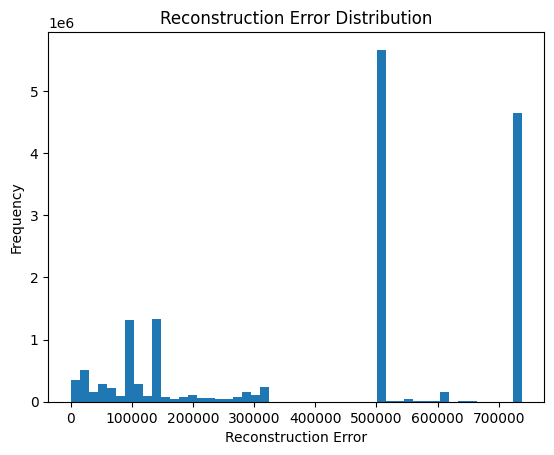

In [ ]:
import matplotlib.pyplot as plt

# reconstruction error
plt.hist(reconstruction_error, bins=50)
plt.title('Reconstruction Error Distribution')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# save the trained model
autoencoder.save('autoencoder_model.h5')